In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import sys
import cufflinks
import cufflinks as cf
%matplotlib inline

In [2]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df_train=pd.read_csv(r"E:\train.csv")
df_test=pd.read_csv(r"E:\test.csv")

In [4]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [5]:
df = df_train._append(df_test) # add two tables one under the other (columns)

In [6]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [11]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [12]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [14]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [15]:
df.Marital_Status.unique()

array([0, 1], dtype=int64)

In [16]:
# Handle categorical feature Gender
df['Gender']=df['Gender'].map({'F': 0, 'M' : 1})

In [17]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [18]:
# Handle categorical feature Gender
df['City_Category']=df['City_Category'].map({'A': 0, 'B' : 1, 'C' : 2})

In [19]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,0,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,0,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,0,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,0,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,2,4+,0,8,NaN,NaN,7969.0


In [20]:
df['Age']=df['Age'].map({'0-17': 1, '18-25': 2, '26-35' : 3, '36-45': 4, '46-50': 5, '51-55' : 6, '55+' : 7  })

In [21]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,0,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,0,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,0,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,2,4+,0,8,NaN,NaN,7969.0


In [22]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+', '')

In [23]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [24]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  int64  
 6   Stay_In_Current_City_Years  783667 non-null  int32  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(1), int64(7), object(1)
memory usage: 74.7+ MB


In [26]:
# Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [27]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [28]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [29]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

<Axes: xlabel='Age', ylabel='Purchase'>

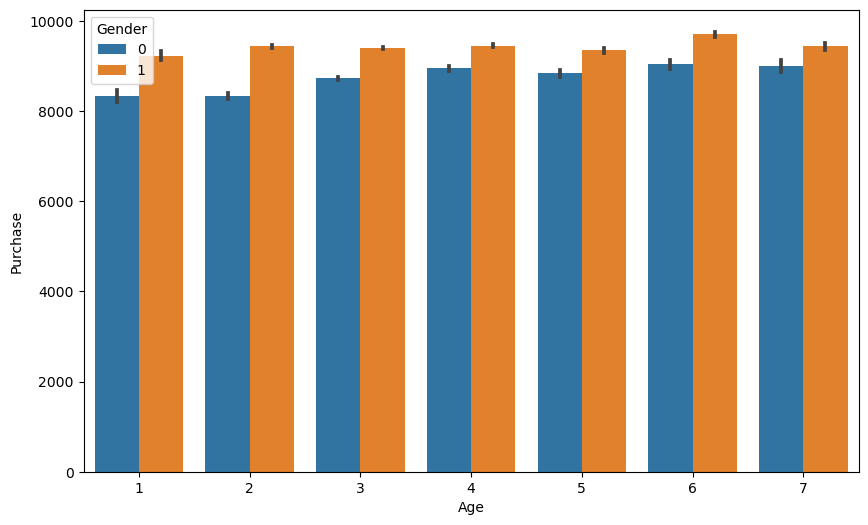

In [30]:
# Visualization for age with respect to purchase
plt.figure(figsize=(10,6))
sns.barplot(x = 'Age', y = 'Purchase', hue = 'Gender', data=df)

<Axes: xlabel='Age', ylabel='Gender'>

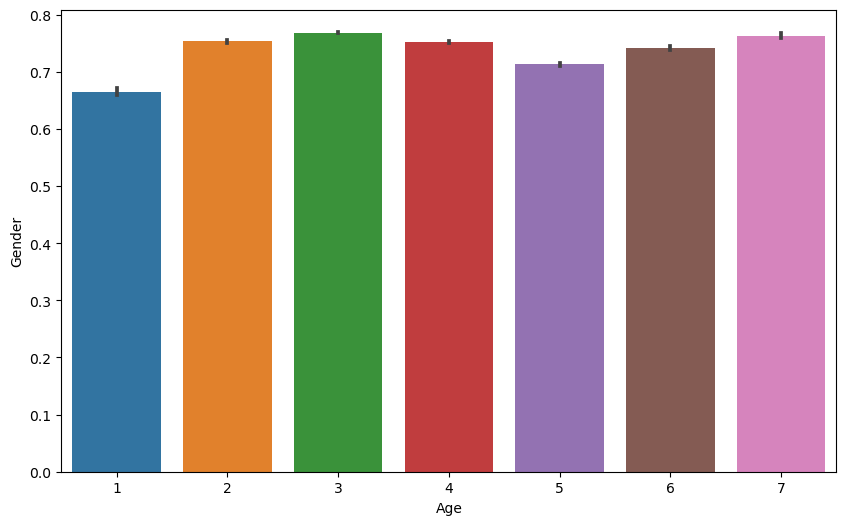

In [31]:
# visualization for age with respect to purchase
plt.figure(figsize=(10,6))
sns.barplot(x= 'Age', y = 'Gender', data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

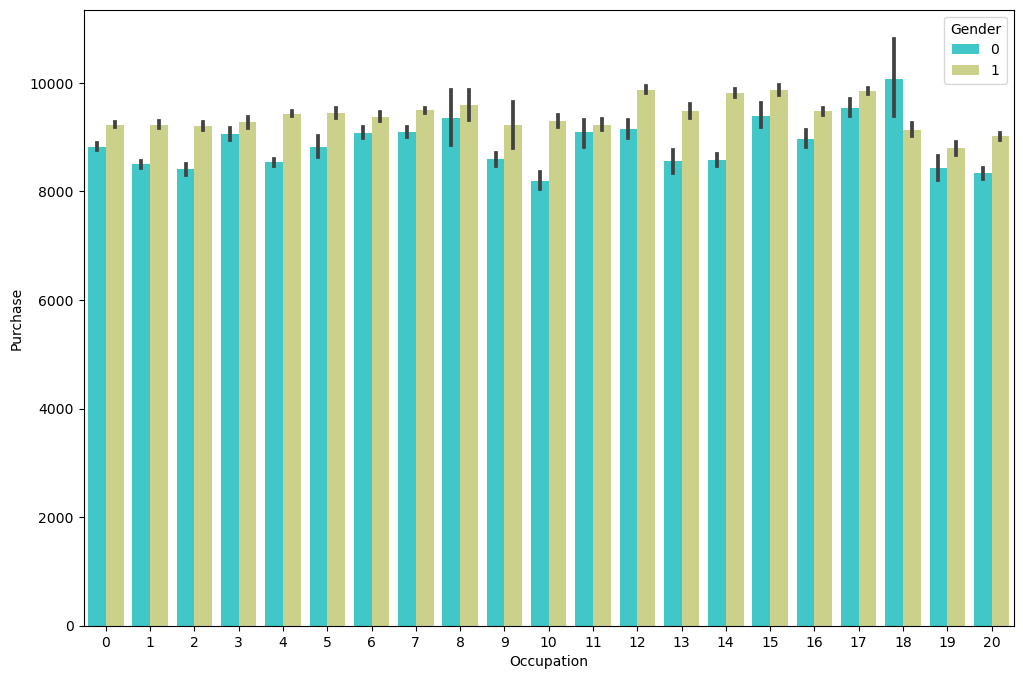

In [33]:
# visualization for Occupation with respect to purchase
plt.figure(figsize=(12,8))
sns.barplot(x= 'Occupation', y = 'Purchase', hue = 'Gender', data=df, palette = 'rainbow')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

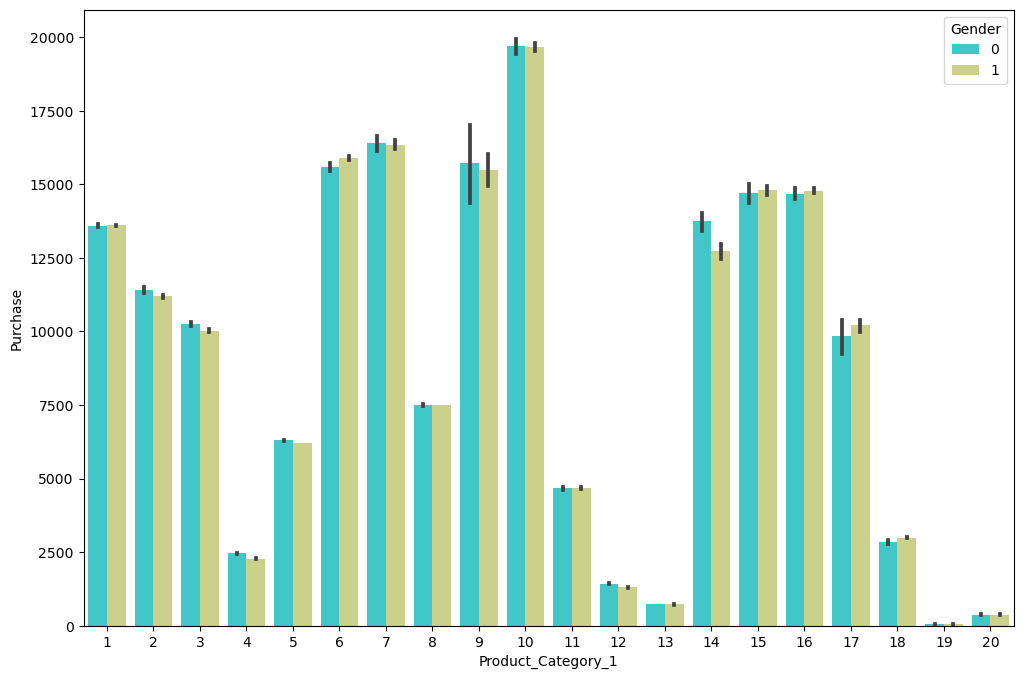

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(x='Product_Category_1', y= 'Purchase', hue = 'Gender', data=df, palette = 'rainbow')

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

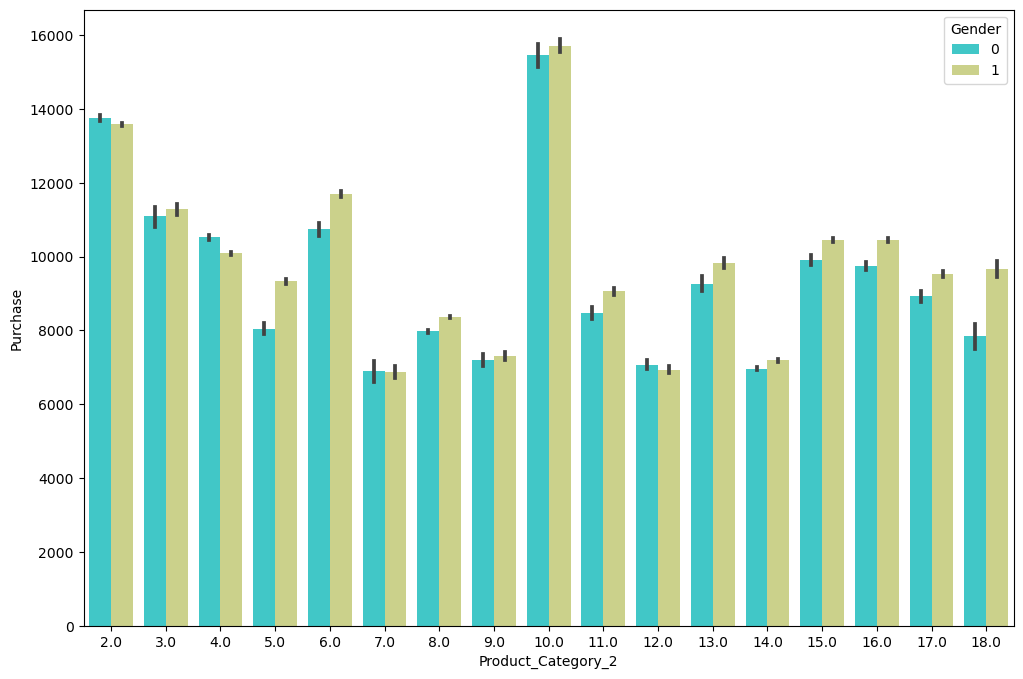

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(x='Product_Category_2', y= 'Purchase', hue = 'Gender', data=df, palette = 'rainbow')

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

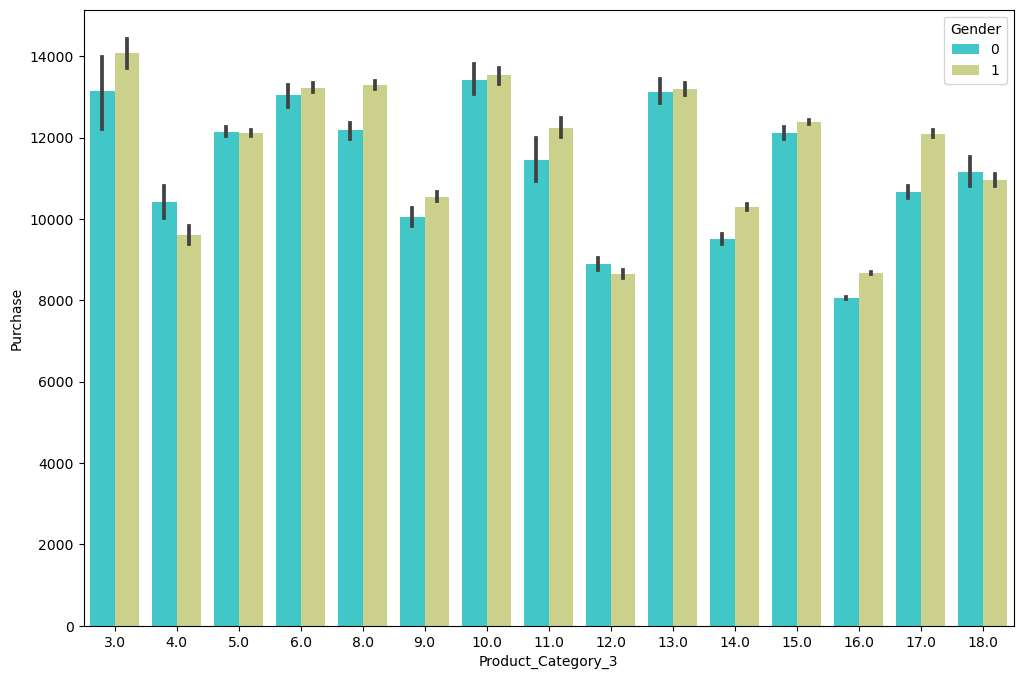

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(x='Product_Category_3', y= 'Purchase', hue = 'Gender', data=df, palette = 'rainbow')